In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings("ignore")

In [128]:
stroke_df = pd.read_csv('./data/healthcare-dataset-stroke-data.csv')
stroke_df.drop('id', axis=1, inplace=True)
stroke_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [129]:
stroke_df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


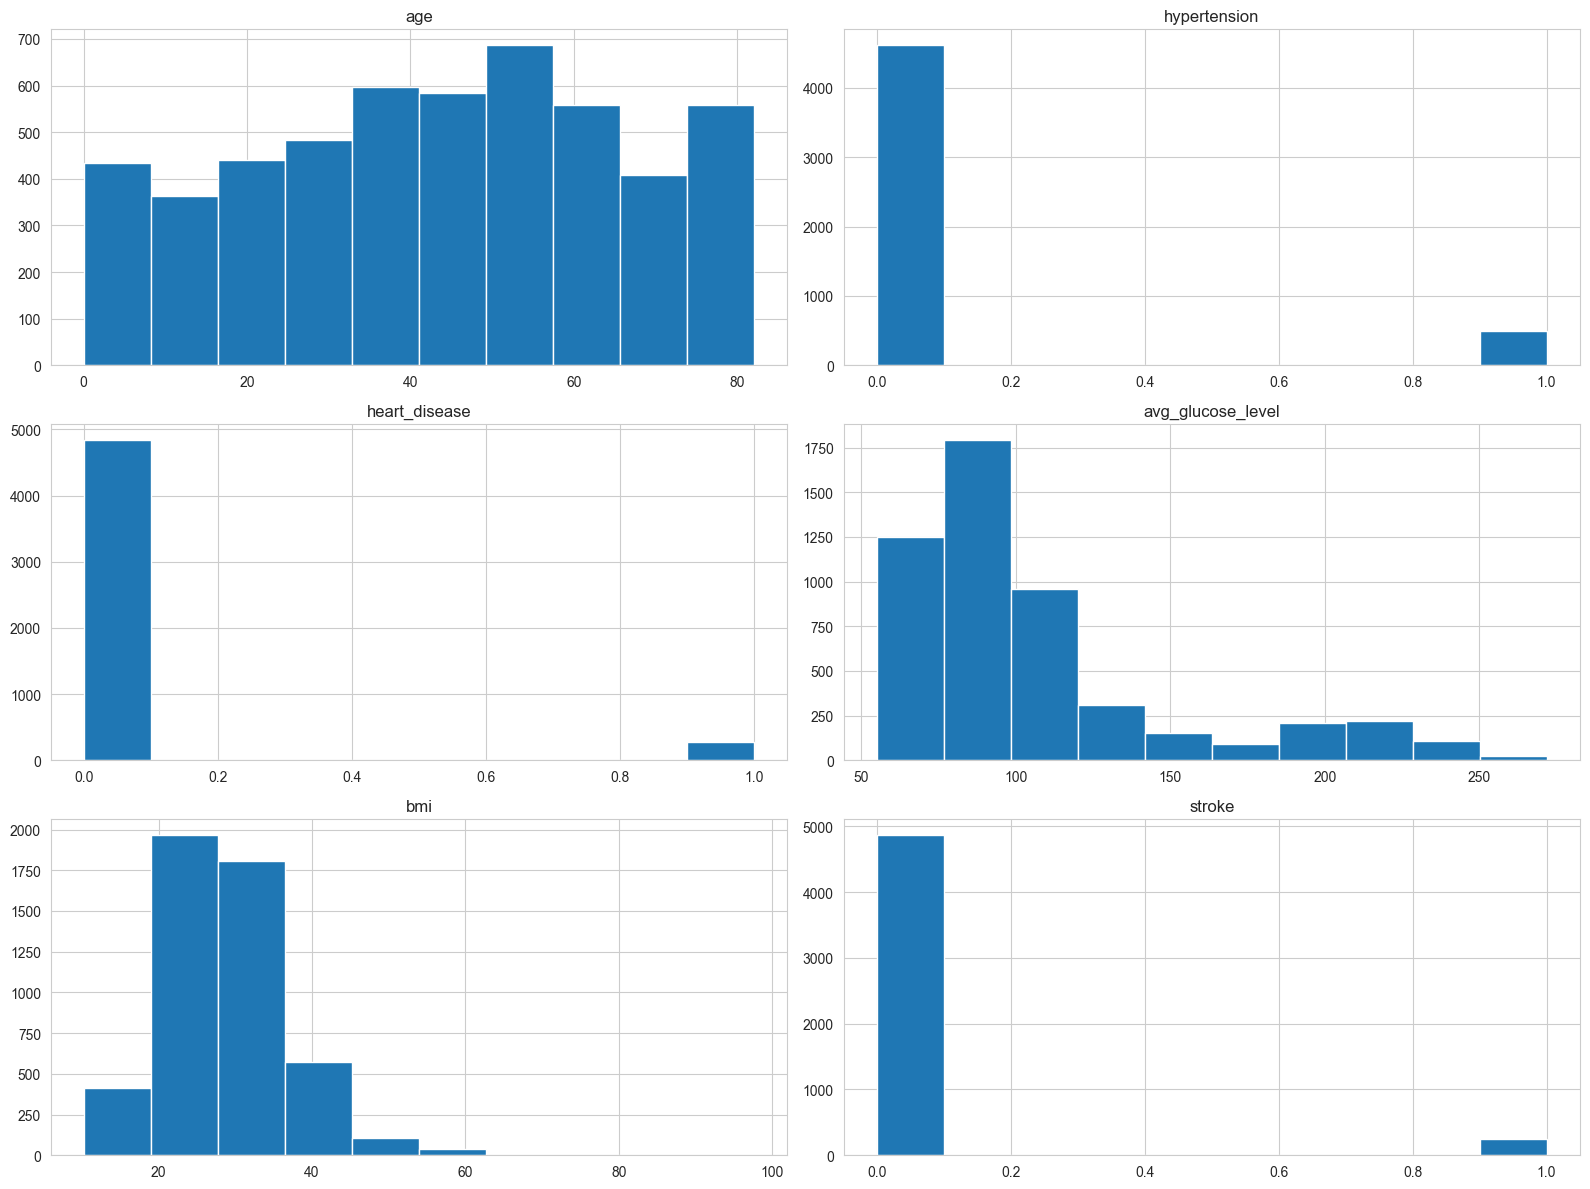

In [130]:
stroke_df.hist(figsize=(16, 12))
# plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

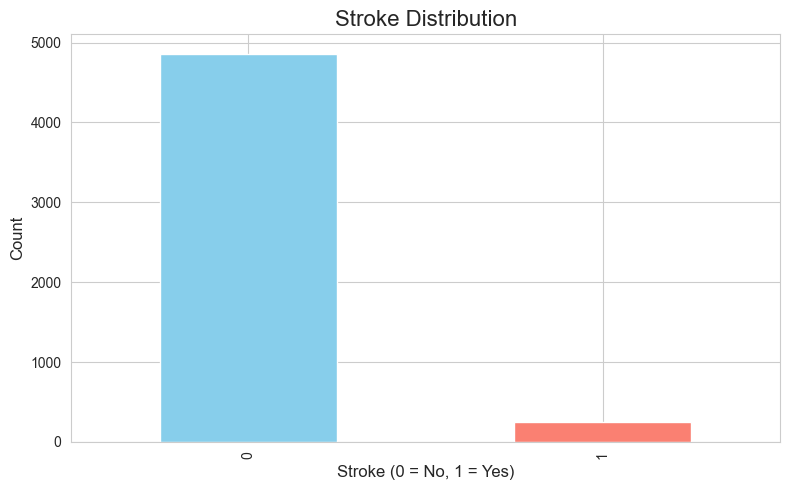

In [131]:
stroke_counts = stroke_df['stroke'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
stroke_counts.plot(kind='bar', color=['skyblue', 'salmon'])

plt.title('Stroke Distribution', fontsize=16)
plt.xlabel('Stroke (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

In [132]:
stroke_df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [133]:
stroke_df['bmi'] = stroke_df['bmi'].fillna(stroke_df['bmi'].mean())

In [134]:
stroke_df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [135]:
stroke_df.duplicated().sum()

0

<Figure size 1000x1600 with 0 Axes>

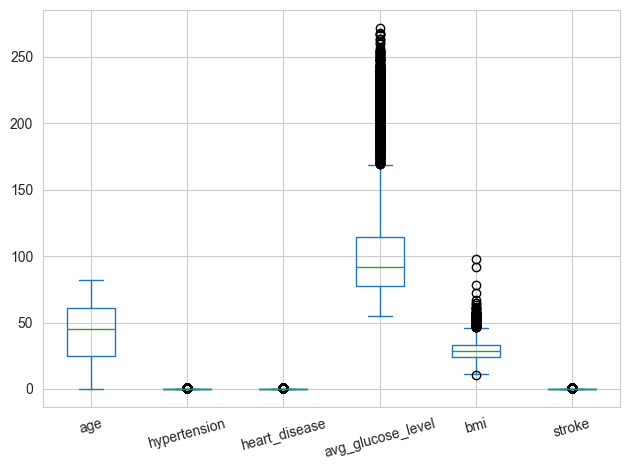

In [136]:
plt.figure(figsize=(10,16))
stroke_df.plot(kind='box')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

In [137]:
def log_transform(df, cols):
    data = df.copy()
    for col in cols:
        data[col] = np.log(df[col] + df[col].min())
    return data

In [138]:
log_stroke = log_transform(stroke_df, ['bmi', 'avg_glucose_level'])

<Figure size 1000x1600 with 0 Axes>

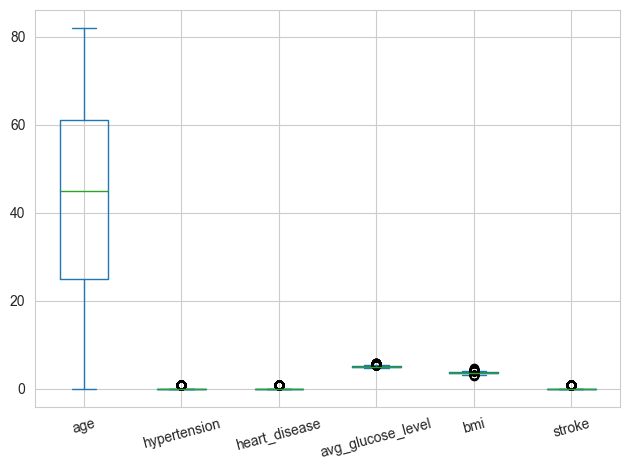

In [139]:
plt.figure(figsize=(10,16))
log_stroke.plot(kind='box')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

In [140]:
age_bins = [17, 35, 50, 65, 100]  
age_label = ['Young Adults', 'Adults', 'Middle-Aged', 'Elderly']  
log_stroke['age_segmentation'] = pd.cut(log_stroke['age'], bins=age_bins, labels=age_label)
log_stroke['age_segmentation'] = log_stroke['age_segmentation'].astype('object')

In [141]:
log_bmi_bins = [0, np.log(18.5), np.log(25), np.log(30), np.log(35), np.log(40), np.inf]
bmi_labels = [
    'Underweight',
    'Normal',
    'Overweight',
    'Obese_Class_I',
    'Obese_Class_II',
    'Obese_Class_III'
]

log_stroke['bmi_segmentation'] = pd.cut(log_stroke['bmi'], bins=log_bmi_bins, labels=bmi_labels)
log_stroke['bmi_segmentation'] = log_stroke['bmi_segmentation'].astype('object')

In [142]:
log_glucose_bins = [0, np.log(100), np.log(125), np.log(200), np.inf]

glucose_labels = [
    'Normal',               # Normal fasting glucose
    'Prediabetes',       # Impaired fasting glucose
    'Diabetes',          # Diabetes range
    'Severe_Hyperglycemia'  # Critical/emergency range
]

log_stroke['glucose_segmentation'] = pd.cut(log_stroke['avg_glucose_level'], bins=log_glucose_bins, labels=glucose_labels)
log_stroke['glucose_segmentation'] = log_stroke['glucose_segmentation'].astype('object')

In [143]:
log_stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_segmentation,bmi_segmentation,glucose_segmentation
0,Male,67.0,0,1,Yes,Private,Urban,5.648305,3.848018,formerly smoked,1,Elderly,Obese_Class_III,Severe_Hyperglycemia
1,Female,61.0,0,0,Yes,Self-employed,Rural,5.550359,3.668504,never smoked,1,Middle-Aged,Obese_Class_II,Severe_Hyperglycemia
2,Male,80.0,0,1,Yes,Private,Rural,5.081653,3.756538,never smoked,1,Elderly,Obese_Class_III,Diabetes
3,Female,49.0,0,0,Yes,Private,Urban,5.422082,3.799974,smokes,1,Adults,Obese_Class_III,Severe_Hyperglycemia
4,Female,79.0,1,0,Yes,Self-employed,Rural,5.434769,3.535145,never smoked,1,Elderly,Obese_Class_I,Severe_Hyperglycemia


## Data Encoding

In [144]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

to_one_hot = log_stroke.select_dtypes(include='object').columns.tolist()

transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first', sparse_output=False), to_one_hot)  
], remainder='passthrough', verbose_feature_names_out=False).set_output(transform="pandas")

stroke_transformed = transformer.fit_transform(log_stroke)

In [168]:
stroke_transformed.head()

,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,...,bmi_segmentation_Obese_Class_III,bmi_segmentation_Overweight,glucose_segmentation_Prediabetes,glucose_segmentation_Severe_Hyperglycemia,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,67.0,0,1,5.648305,3.848018,1
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,61.0,0,0,5.550359,3.668504,1
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,80.0,0,1,5.081653,3.756538,1
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,49.0,0,0,5.422082,3.799974,1
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,79.0,1,0,5.434769,3.535145,1


In [207]:
apriori_stroke_df = stroke_transformed.drop(['bmi', 'avg_glucose_level', 'age'], axis=1)

In [259]:
from mlxtend.frequent_patterns import apriori, association_rules

frq_items = apriori(apriori_stroke_df, min_support = 0.01, use_colnames = True) 

In [260]:
frq_items.sort_values(by='support', ascending = False).head()

,support,itemsets
1,0.656164,(ever_married_Yes)
2,0.572407,(work_type_Private)
5,0.508023,(Residence_type_Urban)
0,0.413894,(gender_Male)
43,0.411742,"(work_type_Private, ever_married_Yes)"


In [261]:
frq_items.shape

(1340, 2)

In [262]:
# Collecting the inferred rules in a dataframe 
rules = association_rules(frq_items, metric ="lift", min_threshold = 3) 
rules = rules.sort_values(['lift'], ascending =[False]) 
rules.sort_values(by='lift', ascending = False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
358,"(bmi_segmentation_Overweight, age_segmentation...","(work_type_children, glucose_segmentation_Pred...",0.073581,0.021722,0.013307,0.180851,8.325666,1.0,0.011709,1.194261,0.949775,0.162291,0.162662,0.396732
361,"(work_type_children, glucose_segmentation_Pred...","(bmi_segmentation_Overweight, age_segmentation...",0.021722,0.073581,0.013307,0.612613,8.325666,1.0,0.011709,2.391453,0.899427,0.162291,0.581844,0.396732
428,"(work_type_children, gender_Male)","(bmi_segmentation_Overweight, Residence_type_U...",0.070646,0.035225,0.019961,0.282548,8.021237,1.0,0.017472,1.344725,0.941870,0.232346,0.256353,0.424608
411,"(bmi_segmentation_Overweight, Residence_type_U...","(work_type_children, gender_Male)",0.035225,0.070646,0.019961,0.566667,8.021237,1.0,0.017472,2.144664,0.907290,0.232346,0.533726,0.424608
421,"(bmi_segmentation_Overweight, age_segmentation...","(Residence_type_Urban, gender_Male, work_type_...",0.073581,0.036791,0.019961,0.271277,7.373529,1.0,0.017254,1.321776,0.933033,0.220779,0.243442,0.406915


In [263]:
rules.shape

(466, 14)

In [264]:
has_stroke = rules[rules['consequents'] == frozenset({'stroke'})]

In [268]:
has_stroke.head(3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
317,"(glucose_segmentation_Severe_Hyperglycemia, ag...",(stroke),0.052446,0.048728,0.011155,0.212687,4.364773,1.0,0.008599,1.208251,0.813561,0.123913,0.172357,0.220801
125,"(glucose_segmentation_Severe_Hyperglycemia, ag...",(stroke),0.056360,0.048728,0.011937,0.211806,4.346692,1.0,0.009191,1.206900,0.815926,0.128151,0.171431,0.228393
44,"(work_type_Private, age_segmentation_Elderly)",(stroke),0.093542,0.048728,0.017221,0.184100,3.778125,1.0,0.012663,1.165918,0.811200,0.137715,0.142307,0.268757


In [269]:
has_stroke.shape

(14, 14)